In [1]:
source('K2methods.r') |> suppressPackageStartupMessages()
library(bnstruct)     |> suppressPackageStartupMessages()

dataset = asia()
dataset = impute(dataset)
data = imputed.data(dataset)

# create dataset in order to assign names
mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)
colnames(DF) <- asia()@variables
head(DF)

Warning message:
"il pacchetto 'bnlearn' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'bnstruct' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'igraph' è stato creato con R versione 4.2.3"
bnstruct :: performing imputation ...

bnstruct :: imputation finished.



,Asia,Tubercolosys,Smoke,LungCancer,Bronchitis,Either,X-ray,Dyspnea
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,2,1,1,1,2,1,2
2,2,1,1,1,1,1,2,1
3,1,1,2,1,1,1,2,1
4,2,1,2,1,1,1,2,1
5,2,1,2,1,1,1,1,2
6,2,1,2,1,1,1,2,2


In [48]:
net = learn.network(asia(), algo = 'mmhc', scoring.func = 'BIC')

... bnstruct :: learning the structure using MMHC ...

... bnstruct :: learning using MMHC completed.

... bnstruct :: learning network parameters ... 

... bnstruct :: parameter learning done.



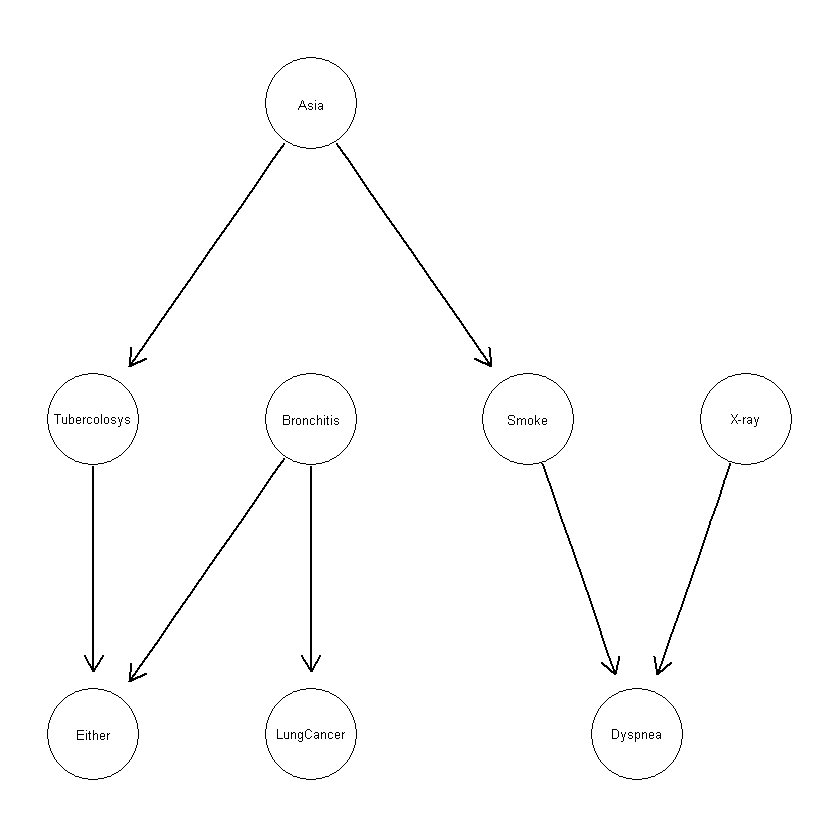

In [49]:
plot(net)

In [50]:
net_bnl = empty.graph(dataset@variables)
amat(net_bnl) = dag(net)

In [51]:
score(net_bnl, data = DF, type = 'bic') # using DF is the same

[1] -24214.78

### `bnstruct` with layering

In [52]:
net = learn.network(asia(), algo = 'sm', scoring.func = 'BDeu', 
                    struct.threshold = 10, param.threshold = 0.001)

... bnstruct :: learning the structure using SM ...

... bnstruct :: learning using SM completed.

... bnstruct :: learning network parameters ... 

... bnstruct :: parameter learning done.



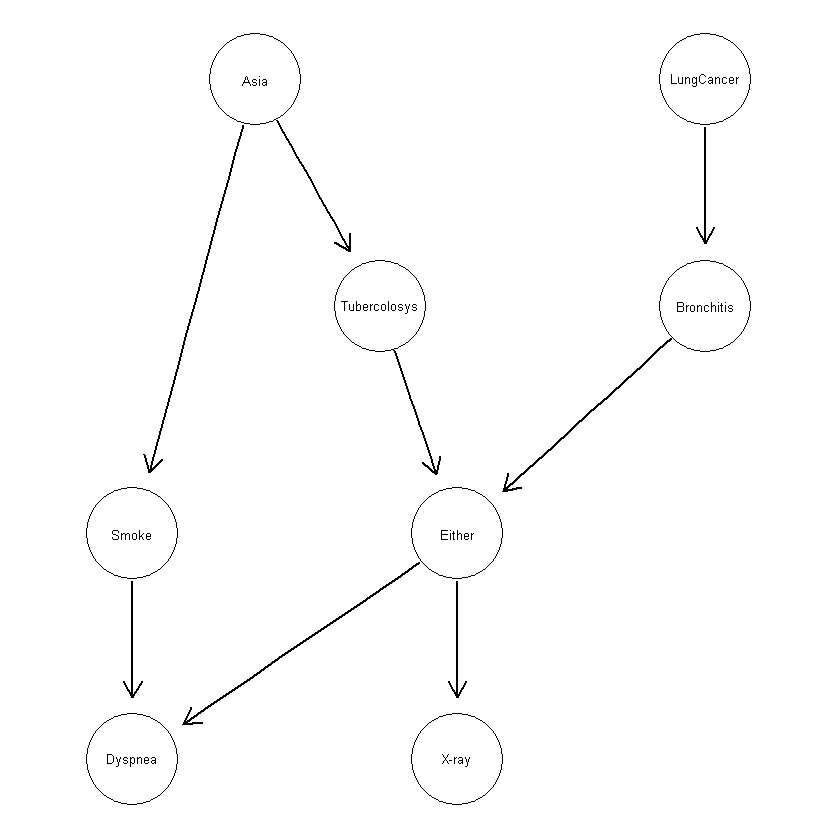

In [53]:
plot(net)

In [54]:
net_bnl = empty.graph(dataset@variables)
amat(net_bnl) = dag(net)
score(net_bnl, data = DF, type = 'bic') # using DF is the same

[1] -22481.35

In [55]:
net_bnl


  Random/Generated Bayesian network

  model:
   [Asia][LungCancer][Tubercolosys|Asia][Smoke|Asia][Bronchitis|LungCancer]
   [Either|Tubercolosys:Bronchitis][X-ray|Either][Dyspnea|Smoke:Either]
  nodes:                                 8 
  arcs:                                  8 
    undirected arcs:                     0 
    directed arcs:                       8 
  average markov blanket size:           2.50 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 
